# **Lasso Regression**
- Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression method that adds an L1 penalty on the coefficients. The L1 penalty tends to shrink some coefficients exactly to zero, so Lasso performs both regularization and feature selection.
- Lasso Regression Does NOT have a closed-form solution because of the L1 penalty (which is not differentiable at 0).zzz

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
# Load the employee dataset from CSV file
df = pd.read_csv("../../datasets/employee_data.csv")
df.head()

,Gender,Designation,Age,Experience,Salary
0,Male,Clerk,29,0,27286
1,Female,Accountant,28,5,44648
2,Male,Salesman,27,1,34631
3,Female,Salesman,56,26,71035
4,Female,IT Officer,22,0,57547


In [61]:
# Convert categorical columns ('Gender' and 'Designation') into numeric dummy variables (0/1)
df_encoded = pd.get_dummies(df, columns=["Gender", "Designation"]).astype(int)
# .astype(int) ensures dummy columns are integers (0 or 1) instead of boolean

df_encoded.head()  # Show first 5 rows to inspect data

,Age,Experience,Salary,Gender_Female,Gender_Male,Designation_Accountant,Designation_Clerk,Designation_IT Officer,Designation_Salesman
0,29,0,27286,0,1,0,1,0,0
1,28,5,44648,1,0,1,0,0,0
2,27,1,34631,0,1,0,0,0,1
3,56,26,71035,1,0,0,0,0,1
4,22,0,57547,1,0,0,0,1,0


In [62]:
# Separate features (X) and target (y)
x = df_encoded.drop(
    "Salary", axis=1
)  # Drop 'Salary' to use all other columns as features
y = df_encoded["Salary"]  # 'Salary' column is the target variable

# Split dataset into training (70%) and test (30%) sets for model evaluation
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=43
)
# random_state=43 ensures reproducible split

In [63]:
# Initialize Linear Regression model (ordinary least squares)
model = LinearRegression()
model.fit(
    x_train, y_train
)  # Fit model on training data, finding coefficients that minimize sum of squared errors

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Predicted Salary')

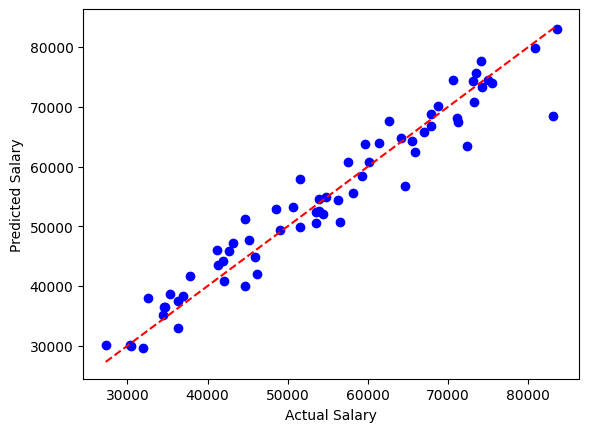

In [64]:
# Predict salary on test data using the trained Linear Regression model
y_pred = model.predict(x_test)

# Plot scatter plot of actual vs predicted salary
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
# Each point represents one test sample; x-axis=actual salary, y-axis=predicted salary

# Plot a red dashed line representing perfect predictions (y_test == y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
)
# Red line is 45° line; ideal predictions would lie exactly on this line

plt.xlabel("Actual Salary") # Label x-axis
plt.ylabel("Predicted Salary")# Label y-axis

In [65]:
# Evaluate model performance using R² score (proportion of variance explained)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
# R² = 1: perfect prediction; closer to 1 is better

R2 Score: 0.9405805481302802


In [66]:
# Scale numerical features for Lasso regression (standardization: mean=0, std=1)
scale = StandardScaler()

x_train_scaled = scale.fit_transform(x_train)# Compute mean/std on training set and scale

x_test_scaled = scale.transform(x_test)# Scale test set using training set parameters

# Initialize Lasso regression model with alpha=1 (regularization strength)
lasso_model = Lasso(alpha=1)

lasso_model.fit(x_train_scaled, y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [67]:
# Predict salary on test data using Lasso
y_pred_lasso = lasso_model.predict(x_test_scaled)
print("R2 Score: ", r2_score(y_test, y_pred_lasso))
# Compare R² with Linear Regression to see effect of regularization

R2 Score:  0.9405756599759199


In [ ]:
# Print coefficients and intercept of Linear Regression
print(f"Linear's Coefficients: {model.coef_}")
print(f"Linear's' Intercept: {model.intercept_}")
# Coefficients show contribution of each feature; intercept is base salary

# Print coefficients and intercept of Lasso
print(f"Lasso's Coefficients: {lasso_model.coef_}")
print(f"Lasso's Intercept: {lasso_model.intercept_}")

Linear's Coefficients: [    58.69910393   1038.67479454    124.19956989   -124.19956989
   2954.34391531 -12872.38464224  17300.60879042  -7382.56806349]
Linear's' Intercept: 41338.604932248614
Lasso's Coefficients: [  673.16460617  8728.85835672   123.15067372    -0.
  1303.32830859 -5541.81822083  7578.25423805 -3180.60496108]
Lasso's Intercept: 53409.155844155845
